In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from math import sin, cos, tan

## Notebook for bruk på selve eksamen 2022


In [2]:
# Oppgave 1

In [3]:
# Oppgave 2

In [4]:
# Oppgave 3

In [5]:
# Oppgave 4

In [6]:
# Oppgave 5

Euler residuals [0, -0.25, -0.5, -0.75, -1.0, -1.25]
Midpoint residuals [0, -0.5, -1.0, -1.5, -2.0, -2.5]

Estimated solutions:
Euler forward:  1.22
Midpoint:  1.4


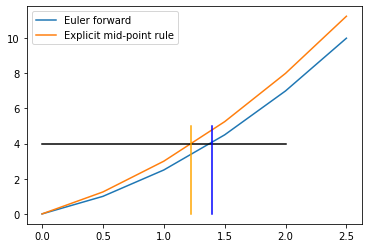

In [48]:
# Oppgave 6 a og b)
def r(u, lam):
    return u + u**2 - lam

def dr(u):
    return 1 + 2*u

delta_u = 0.5
lam0 = 0
u0 = 0

us = [u0]
lams_euler = [lam0]
residuals_euler = [0]
lams_mid = [lam0]
residuals_mid = [0]

lam_euler = lam0
lam_mid = lam0
u = u0
for x in range(num_iter):
    u = u + delta_u
    lam_euler = lam_euler + dr(u)*delta_u
    lam_mid = lam_mid + dr(u + delta_u/2)*delta_u
    
    lams_euler.append(lam_euler)
    residuals_euler.append(r(u, lam_euler))
    
    lams_mid.append(lam_mid)
    residuals_mid.append(r(u, lam_mid))
    
    us.append(u)
    
plt.plot(us, lams_euler, label="Euler forward")
plt.plot(us, lams_mid, label="Explicit mid-point rule")
plt.plot([0,2], [4,4], color="black")
plt.plot([1.22, 1.22], [0, 5], color="orange")
plt.plot([1.4, 1.4], [0, 5], color="blue")
plt.legend()

print("Euler residuals", residuals_euler)
print("Midpoint residuals", residuals_mid)
print("")
print("Estimated solutions:")
print("Euler forward: ", 1.22)
print("Midpoint: ", 1.4)



In [53]:
# Oppgave 6 d) Newton iteration
lam = 4
def r(u, lam):
    return u + u**2 - lam

def dr(u):
    return 1 + 2*u

lam = 4
u0 = 1
u_n = u0
for i in range(6):
    u_n1 = u_n - r(u_n, lam)/dr(u_n)
    u_n = u_n1
    print(f"iteration {i}:", u_n)


iteration 0: 1.6666666666666665
iteration 1: 1.564102564102564
iteration 2: 1.5615543876413442
iteration 3: 1.5615528128094318
iteration 4: 1.5615528128088303
iteration 5: 1.5615528128088303


Euler residual: -0.25
Euler residual: -0.5
Euler residual: -0.75
Euler residual: -1.0
Euler residual: -1.25


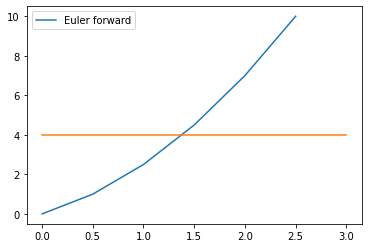

In [30]:
# Oppgave 6a, residual equation stuff

lams_euler_forward = [0]
lams_euler_backward = [0]
lams_trapezoidal = [0]

us =  [0]

def r(u, lam):
    return u + u**2 - lam

def dp(u):
    return 1 + 2*u

du = 0.5

u = 0
lam = 0
for i in range(5):
    u += du
    lams_euler_forward.append(lams_euler_forward[-1] + dp(u)*du)
    lams_euler_backward.append(lams_euler_backward[-1] + dp(u+du)*du)
    lams_trapezoidal.append(lams_trapezoidal[-1] + 0.5*(dp(u)*du + dp(u+du)*du))
    print("Euler residual:", r(u, lams_euler_forward[-1]))
   
    us.append(u)

plt.plot(us, lams_euler_forward, label="Euler forward")
#plt.plot(us, lams_euler_backward, label="Euler Backward")
#plt.plot(us, lams_trapezoidal, label="Trapezoidal")
plt.plot([0,3], [4,4] )
plt.legend()

In [8]:
# Oppgave 7

In [9]:
# Oppgave 8

In [10]:
# Old stuff 2019

In [11]:
F = 10
def s(alph):
    return 2*F/(tan(alph))

In [12]:
x = np.linspace(0.1, math.pi*0.45, 200)
y = [s(a) for a in x]

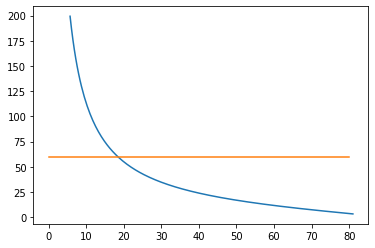

In [13]:
plt.plot(x*180/math.pi,y)
plt.plot([0,80], [60,60])

In [14]:
#for ang, s in zip(x,y):
#    print(round(ang, 1)*180/math.pi, round(s,1))

In [15]:
# Oppgave 3d) dampening
w1 = 800*2*math.pi/60
w2 = 8000*2*math.pi/60
a1 = (2*w1*w2)*(0.05*w2 - 0.1*w1)/(w2**2-w1**2)
print("a1", a1)

a2 = 2*(0.1*w2-0.05*w1)/(w2**2-w1**2)
print("a2", a2)


a1 6.769761947129522
a2 0.00022908666051106157


In [16]:
# Deformation element fra eksamen 2020
x1 = np.array([1, 0.5])
x2 = np.array([2.0, 1.0])
v = [.2, .3, .5, -.1, 1, .6]

v_glob1 = np.array([0.25, 0.3])
v_glob2 = np.array([-0.1, 1])
v_glob = np.concatenate((v_glob1, v_glob2))
L0_vec = x2 - x1
L0 = np.linalg.norm(L0_vec)
Ld_vec = (x2 + v_glob2) - (x1+v_glob1)
Ld = np.linalg.norm(Ld_vec)

deformation = Ld - L0
v_loc = np.array([-deformation/2, 0, deformation/2, 0])
print("Deformation in local system\n", v_loc)

Deformation in local system
 [-0.12335021  0.          0.12335021  0.        ]


In [17]:
# Deformation element fra eksamen 2019
x1 = np.array([1, 0.5])
x2 = np.array([2.0, 1.0])
v = [.2, .3, .5, -.1, 1, .6]
v_glob1 = v[:2]
v_glob2 = v[3:5]

L0_vec = x2 - x1 # vector that represents original bar
L0 = np.linalg.norm(L0_vec) # Length of original bar

org_vinkel = math.atan(L0_vec[1]/L0_vec[0]) # Angle of original bar


Ld_vec = (x2 + v_glob2) - (x1+v_glob1)  # vector that represents new bar
ny_vinkel = math.atan(Ld_vec[1]/Ld_vec[0]) # angle of new bar

vinkel_endring = ny_vinkel - org_vinkel

print("Utgangs-vinkel", org_vinkel)
print("Ny vinkel", ny_vinkel)


Ld = np.linalg.norm(Ld_vec) # Length of new bar

deformation = Ld - L0

def_vinkel1_loc = v[2] - vinkel_endring
def_vinkel2_loc = v[5] - vinkel_endring


v_loc = np.array([0, 0, def_vinkel1_loc, deformation, 0, def_vinkel2_loc ])
print("Deformation in local system\n", v_loc)

Utgangs-vinkel 0.4636476090008061
Ny vinkel 1.042721878368537
Deformation in local system
 [ 0.          0.         -0.07907427  0.27121041  0.          0.02092573]


In [18]:
# Stiffness in local system
EA = 1000
k = EA / L0

K_mat = np.array([[k, 0, -k, 0],
                  [0, 0, 0, 0],
                  [-k, 0, k, 0],
                  [0, 0, 0, 0]])
print("Material stiffness in local system:\n", K_mat)

N = k*deformation
kg = N/Ld

K_geo = np.array([[0, 0, 0, 0],
                  [0, kg, 0, -kg],
                  [0, 0, 0, 0],
                  [0, -kg, 0, -kg]])
print("\nGeometric stiffness in local system:\n", K_geo)

K_tan_loc = K_mat + K_geo
print("\nTangent stiffness in local system:\n", K_tan_loc)

v_loc2 = list(v_loc[:2])
v_loc2.extend(v_loc[3:5])
#print(v_loc2)
F_int1 = np.matmul(K_mat, v_loc2)
F_int1 = np.matmul(v_loc2, K_mat)
print("\nInternal Forces in local system:\n", F_int1)
#print(K_mat)
print("\n\n\n\n")
F_int_glob = T_el.transpose()
print("Global internal forces: \n", F_int_glob)

Material stiffness in local system:
 [[ 894.427191    0.       -894.427191    0.      ]
 [   0.          0.          0.          0.      ]
 [-894.427191    0.        894.427191    0.      ]
 [   0.          0.          0.          0.      ]]

Geometric stiffness in local system:
 [[   0.            0.            0.            0.        ]
 [   0.          174.61144025    0.         -174.61144025]
 [   0.            0.            0.            0.        ]
 [   0.         -174.61144025    0.         -174.61144025]]

Tangent stiffness in local system:
 [[ 894.427191      0.         -894.427191      0.        ]
 [   0.          174.61144025    0.         -174.61144025]
 [-894.427191      0.          894.427191      0.        ]
 [   0.         -174.61144025    0.         -174.61144025]]

Internal Forces in local system:
 [-242.57796536    0.          242.57796536    0.        ]







NameError: name 'T_el' is not defined

In [ ]:
# Transformation matrix, samme oppgave
e_x = Ld_vec / Ld
e_y = np.array([-e_x[1], e_x[0]])
T_small = np.array([e_x, e_y])
print("Tsmall: \n", T_small)

T_el = np.zeros([4,4])
T_el[0:2, 0:2] = T_small[:,:]
T_el[2:4, 2:4] = T_small[:,:]
print("")
print("T_el: \n", T_el)

In [ ]:
# Oppgave 6 euler stuff
def r(theta, lam):
    return math.tan(theta) - lam
def dr(theta, lam):
    return 1/(math.cos(theta))**2

In [ ]:
lam_0 = 0
theta_0 = 0
thetas = [theta_0]
lams = [lam_0]

theta = theta_0
lam = lam_0
for i in range(3):
    theta += 0.4
    lam = lam + dr(theta, lam)*0.4
    thetas.append(theta)
    lams.append(lam)
    #print("residual:", r(theta, lam))
    
plt.plot(thetas, lams)


thetas = [theta_0]
lams = [lam_0]

theta = theta_0
lam = lam_0
for i in range(100):
    theta += 0.01
    lam = lam + dr(theta, lam)*0.01
    thetas.append(theta)
    lams.append(lam)
    #print("residual:", r(theta, lam))
    
plt.plot(thetas, lams)


plt.plot([0, 1.2], [1.5, 1.5])

    

print("Svar er ca 0.85")
print("Ved å se på grafen kan det estimeres til 0.83", r(0.98, 1.5))
print("Ved høyere presisjon blir svaret ca 0.98", r(0.98, 1.5))